<h1 style="color: red; text-align: center;"> Tarea 1 </h1>
<h3 style="color: red; text-align: center;"> Por: Guillermo De Mendoza </h3>
<h3 style="color: red; text-align: center;"> Materia: Mineria de datos </h3>

### Importar librerias

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

### Obtener el set de datos

In [21]:
FOLDER ='C:\\Users\\Administrador\\Desktop\\Maestria\\MMA_cursoMetodosAnalisisDatos\\Guillermo De Mendoza\\Mineria de datos - semestre 4\\'
DOCUMENT = 'Colombia-Feb21.xlsx'
FULL_PATH = "./" + DOCUMENT

In [22]:
data = pd.read_excel(FULL_PATH, sheet_name=0)

### Preprocesar datos - ciudades

In [23]:
madridDataframe = data[data["Headquarters Location"] == "CanadÃ¡, Cundinamarca, Colombia"]
print(len(madridDataframe))
madridDataframe

7


,Organization Name,Organization Name URL,Industries,Headquarters Location,Description,CB Rank (Company),Founded Date,Founded Date Precision,Last Funding Date,Last Funding Amount,Last Funding Amount Currency,Last Funding Amount Currency (in USD),Last Equity Funding Amount,Last Equity Funding Amount Currency,Last Equity Funding Amount Currency (in USD)
262,Biometric Update,https://www.crunchbase.com/organization/biomet...,"Market Research, Point of Sale","CanadÃ¡, Cundinamarca, Colombia",BiometricUpdate.com is the leading online sour...,164.753,2012-01-01 00:00:00,year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
321,Qinaya,https://www.crunchbase.com/organization/qinaya,"Cloud Data Services, Web Development","CanadÃ¡, Cundinamarca, Colombia",Qinaya offers a range of web design and develo...,214.335,NaN,NaN,2011-09-02 00:00:00,24902,EUR,35383.0,24902,EUR,35383.0
322,Partsium,https://www.crunchbase.com/organization/partsium,NaN,"CanadÃ¡, Cundinamarca, Colombia",Partsium is a B2B Market Place that facilitate...,214.338,2018-01-01 00:00:00,year,2019-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
426,Boardwalk REIT,https://www.crunchbase.com/organization/boardw...,Real Estate,"CanadÃ¡, Cundinamarca, Colombia",Boardwalk Real Estate Investment Trust is an o...,293.094,1984-01-01 00:00:00,year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
458,Pulse Software,https://www.crunchbase.com/organization/pulse-...,"Real Time, Software","CanadÃ¡, Cundinamarca, Colombia",Pulse Software is a software development compa...,318.768,2014-01-01 00:00:00,year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
684,ChartBRAIN,https://www.crunchbase.com/organization/chartb...,"Music, Video, Video Streaming","CanadÃ¡, Cundinamarca, Colombia",Streaming Music Video Playlists,472.896,2012-05-01 00:00:00,day,NaN,NaN,NaN,NaN,NaN,NaN,NaN
696,LIFT Partners,https://www.crunchbase.com/organization/lift-p...,Non Profit,"CanadÃ¡, Cundinamarca, Colombia",LIFT is a not-for-profit organization.,480.725,2001-01-01 00:00:00,year,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# eliminar ciudades que se detectan con datos no validos

# internet
data = data.drop([610,847,945,969])

# los angeles huila
data = data.drop([312,411,842,593,694])

# madrid 
data = data.drop([98,218,222,331,365,389,393,405,573,729,730,791,874,900,910,930,965,989,997])

# Canada
data = data.drop([262,321,426,458,684,696])


In [25]:
data[data["Organization Name"]=="Partsium"]["Headquarters Location"] = "Bogota"

<ipython-input-25-f4a8966fc6ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data["Organization Name"]=="Partsium"]["Headquarters Location"] = "Bogota"


In [26]:
data = data.replace(to_replace ="MedellÃ­n, Antioquia, Colombia", value ="Medellin")
data = data.replace(to_replace ="BogotÃ¡, Distrito Especial, Colombia", value ="Bogota")
data = data.replace(to_replace ="Cundinamarca, Distrito Especial, Colombia", value ="Cundinamarca")
data = data.replace(to_replace ="Barranquilla, Atlantico, Colombia", value ="Barranquilla")
data = data.replace(to_replace ="Cali, Valle del Cauca, Colombia", value ="Cali")
data = data.replace(to_replace ="Rionegro, Antioquia, Colombia", value ="Rionegro")
data = data.replace(to_replace ="Villavicencio, Meta, Colombia", value ="Villavicencio")
data = data.replace(to_replace ="https://www.crunchbase.com/organization/alegra-sistema-contable-administrativo-y-de-facturaciÃ³n", value ="")
data = data.replace(to_replace ="Madrid, Distrito Especial, Colombia", value ="Madrid")
data = data.replace(to_replace ="Armenia, Quindio, Colombia", value ="Armenia")
data = data.replace(to_replace ="Bucaramanga, Cundinamarca, Colombia", value ="Bucaramanga")
data = data.replace(to_replace ="Cota, Cundinamarca, Colombia", value ="Cota")
data = data.replace(to_replace ="UsaquÃ©n, Distrito Especial, Colombia", value ="Bogota")
data = data.replace(to_replace ="Asturias, Cundinamarca, Colombia", value ="Asturias")
data = data.replace(to_replace ="Mosquera, Cundinamarca, Colombia", value ="Mosquera")
data = data.replace(to_replace ="Cartagena, Bolivar, Colombia", value ="Cartagena")
data = data.replace(to_replace ="GarzÃ³n, Huila, Colombia", value ="Garzon")
data = data.replace(to_replace ="PerÃº, Valle del Cauca, Colombia", value ="Pereira")
data = data.replace(to_replace ="Brasilia, Distrito Especial, Colombia", value ="Brasilia")
data = data.replace(to_replace ="Valledupar, Cesar, Colombia", value ="Valledupar")
data = data.replace(to_replace ="Montenegro, Quindio, Colombia", value ="Montenegro")
data = data.replace(to_replace ="ChÃ­a, Cundinamarca, Colombia", value ="Chia")
data = data.replace(to_replace ="Colombiano, Magdalena, Colombia", value ="Colombia")
data = data.replace(to_replace ="CanadÃ¡, Cundinamarca, Colombia", value ="Canada")
data = data.replace(to_replace ="Pereira, Risaralda, Colombia", value ="Pereira")
data = data.replace(to_replace ="SopÃ³, Cundinamarca, Colombia", value ="Sopo")
data = data.replace(to_replace ="Los Angeles, Huila, Colombia", value ="Los Angeles")
data = data.replace(to_replace ="Manizales, Caldas, Colombia", value ="Manizales")
data = data.replace(to_replace ="Sabaneta, Antioquia, Colombia", value ="Sabaneta")
data = data.replace(to_replace ="Santiago De Cali, Valle del Cauca, Colombia", value ="Santiago De Cali")
data = data.replace(to_replace ="Miami, Magdalena, Colombia", value ="Miami")
data = data.replace(to_replace ="ItagÃ¼Ã­, Antioquia, Colombia", value ="Itagui")
data = data.replace(to_replace ="Financial Services", value ="Financial Services")
data = data.replace(to_replace ="Envigado, Antioquia, Colombia", value ="Envigado")
data = data.replace(to_replace ="TuluÃ¡, Valle del Cauca, Colombia", value ="Tulua")
data = data.replace(to_replace ="IbaguÃ©, Tolima, Colombia", value ="Ibague")
data = data.replace(to_replace ="Chile, Huila, Colombia", value ="Chile")
data = data.replace(to_replace ="PanamÃ¡, Magdalena, Colombia", value ="Panama")
data = data.replace(to_replace ="Antioquia, Antioquia, Colombia", value ="Antioquia")
data = data.replace(to_replace ="Santander, Bolivar, Colombia", value ="Santander")
data = data.replace(to_replace ="AndalucÃ­a, Valle del Cauca, Colombia", value ="Andalucia")
data = data.replace(to_replace ="Floridablanca, Santander, Colombia", value ="Floridablanca")
data = data.replace(to_replace ="AtlÃ¡ntico, Magdalena, Colombia", value ="Atlantico")
data = data.replace(to_replace ="Florida, Santander, Colombia", value ="Florida")
data = data.replace(to_replace ="Internet, Software", value ="Medellin")
data = data.replace(to_replace ="Dosquebradas, Cundinamarca, Colombia", value ="Dosquebradas")
data = data.replace(to_replace ="Girardot, Cundinamarca, Colombia", value ="Girardot")
data = data.replace(to_replace ="Maryland, Cundinamarca, Colombia", value ="Maryland")
data = data.replace(to_replace ="Pasto, Narino, Colombia", value ="Pasto")
data = data.replace(to_replace ="Barrios Unidos, Distrito Especial, Colombia", value ="Bogota")
data = data.replace(to_replace ="Bavaria, Cundinamarca, Colombia", value ="Bavaria")
data = data.replace(to_replace ="MÃ©xico, Huila, Colombia", value ="Mexico")
data = data.replace(to_replace ="Neiva, Huila, Colombia", value ="Neiva")
data = data.replace(to_replace ="CÃºcuta, Antioquia, Colombia", value ="Cucuta")
data = data.replace(to_replace ="Information Technology, Product Design", value ="Internet")
data = data.replace(to_replace ="Copacabana, Antioquia, Colombia", value ="Copacabana")
data = data.replace(to_replace ="Santa Marta, Magdalena, Colombia", value ="Santa Marta")
data = data.replace(to_replace ="Advertising, E-Commerce, Internet", value ="Bogota")
data = data.replace(to_replace ="PopayÃ¡n, Cordoba, Colombia", value ="Popayan")
data = data.replace(to_replace ="Cartago, Valle del Cauca, Colombia", value ="Cartago")
data = data.replace(to_replace ="Mariquita, Tolima, Colombia", value ="Mariquita")
data = data.replace(to_replace ="Soacha, Cundinamarca, Colombia", value ="Soacha")
data = data.replace(to_replace ="Bavaria, Magdalena, Colombia", value ="Bavaria")
data = data.replace(to_replace ="Duitama, Boyaca, Colombia", value ="Duitama")
data = data.replace(to_replace ="El Paso, Cesar, Colombia", value ="El Paso")
data = data.replace(to_replace ="Las Vegas, Sucre, Colombia", value ="Las Vegas")
data = data.replace(to_replace ="Espinal, Tolima, Colombia", value ="Espinal")
data = data.replace(to_replace ="Albania, La Guajira, Colombia", value ="Albania")
data = data.replace(to_replace ="BoyacÃ¡, Boyaca, Colombia", value ="Boyaca")
data = data.replace(to_replace ="Santa Rosa De Cabal, Risaralda, Colombia", value ="Santa Rosa De Cabal")

### Preprocesar datos - fondos

In [27]:
data["Last Funding Amount"] = data["Last Funding Amount"].fillna(0)
data["Last Funding Amount"] = data["Last Funding Amount"].replace(to_replace ="year", value =0)
data["Last Equity Funding Amount Currency (in USD)"] = data["Last Equity Funding Amount Currency (in USD)"].fillna(0)

### Preprocesar datos - crear columna años "year"

In [28]:
years = []
for index in range(len(data)):
    fundingDate = data.iloc[index]["Last Funding Date"]
    year = str(fundingDate)
    if year == 'nan' or year == 'year' or year == 'day':
        year = "0"
    years.append(int(year.split("-")[0]))
data["year"] = years

### Visualizar datos

In [29]:
data.head(5)

,Organization Name,Organization Name URL,Industries,Headquarters Location,Description,CB Rank (Company),Founded Date,Founded Date Precision,Last Funding Date,Last Funding Amount,Last Funding Amount Currency,Last Funding Amount Currency (in USD),Last Equity Funding Amount,Last Equity Funding Amount Currency,Last Equity Funding Amount Currency (in USD),year
0,La Haus,https://www.crunchbase.com/organization/la-haus,"Information Technology, Marketplace, Real Esta...",Medellin,La Haus is a residential marketplace used to h...,654,2017-04-01 00:00:00,day,2021-01-14 00:00:00,35000000,USD,35000000.0,35000000,USD,35000000.0,2021
1,Dondo,https://www.crunchbase.com/organization/crowdswap,NaN,Bogota,Get what you want giving what you have,1.258,2019-04-01 00:00:00,day,2021-01-19 00:00:00,2100000,USD,2100000.0,2100000,USD,2100000.0,2021
2,Aflore,https://www.crunchbase.com/organization/aflore,"Credit, Finance, Financial Services, FinTech",Bogota,Aflore is a developer of tech-enabled direct s...,2.224,2012-01-01 00:00:00,year,2021-02-05 00:00:00,6500000,USD,6500000.0,6500000,USD,6500000.0,2021
3,Liftit,https://www.crunchbase.com/organization/liftit-co,"Freight Service, Internet, Last Mile Transport...",Bogota,Liftit is the leading technology platform to a...,5.346,2017-01-07 00:00:00,day,2020-07-08 00:00:00,22500000,USD,22500000.0,22500000,USD,22500000.0,2020
4,Chiper,https://www.crunchbase.com/organization/chiper,"B2B, E-Commerce, Retail Technology",Cundinamarca,Chiper is a Colombian e-commerce platform for ...,5.86,2018-01-01 00:00:00,year,2020-10-16 00:00:00,12000000,USD,12000000.0,12000000,USD,12000000.0,2020


### Tarea 1

Generar las siguientes graficas

1.	Top 20 de ciudades por concentración de empresas 
2.	Distribución de ciudades por capital levantado 
3.	Distribución de ciudades por capital levantado por año 
4.	Distribución de ciudades por capital levantado por sector 
5.	Sectores con mayor inversión equity 
6.	15 rondas de financiación más grandes por año

### Punto 1:

Top 20 de ciudades por concentración de empresas

In [45]:
df = data.groupby("Headquarters Location")["Headquarters Location"].count().reset_index(name='count') \
                             .sort_values(['count'], ascending=False) \
                             .head(20)
#df

In [44]:
df.shape

(20, 2)

[[0.95573167 0.26529793 0.11699474 0.03460408 0.01977376 0.01318251
  0.01153469 0.01153469 0.01153469 0.00659125 0.00659125 0.00659125
  0.00659125 0.00494344 0.00494344 0.00494344 0.00494344 0.00494344
  0.00494344 0.00494344]]


<BarContainer object of 20 artists>

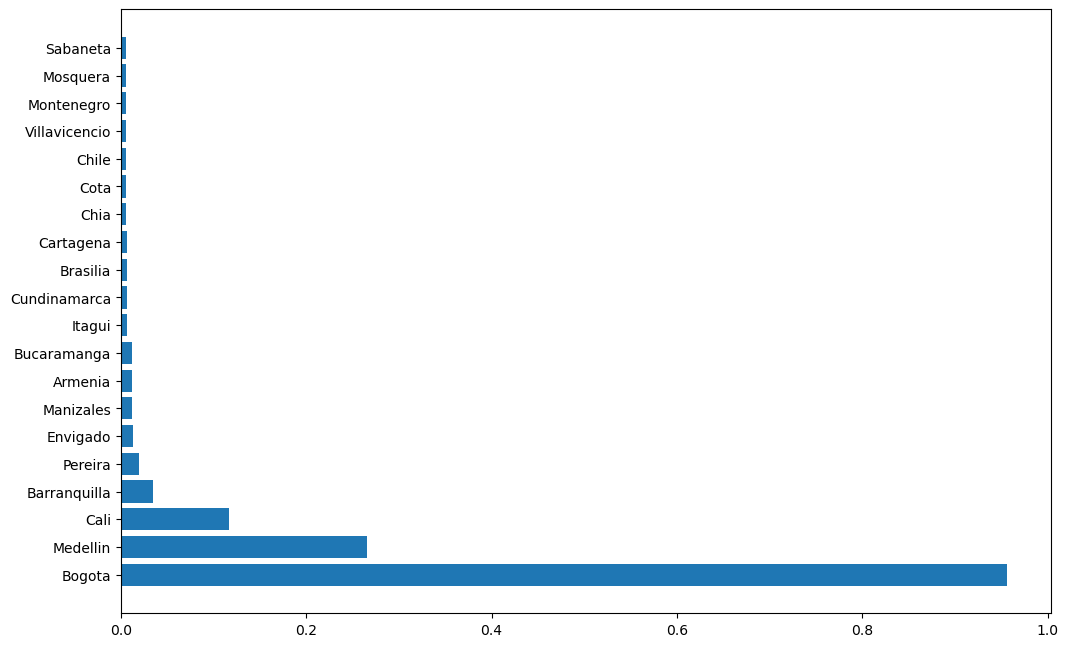

In [49]:
# validar con histograma
# realizar 

x = df["Headquarters Location"]
y = df["count"]

locationNormalized = preprocessing.normalize([y])

print(locationNormalized)

plt.barh(df["Headquarters Location"].tolist(),locationNormalized[0])

### Punto 2:

Distribución de ciudades por capital levantado

In [13]:
df = data.groupby("Headquarters Location")["Last Funding Amount"].sum().reset_index(name='sum')
df.sort_values(by=['sum'], inplace=True, ascending=False)
df = df.drop(df[df["Headquarters Location"] == ""].index)
df


,Headquarters Location,sum
9,Bogota,8237893385
21,Cota,6500000000
42,Medellin,1750628000
7,Barranquilla,170180000
62,Villavicencio,150000000
...,...,...
1,Albania,0
33,Girardot,0
34,Ibague,0
35,Internet,0


### Punto 3:

Distribución de ciudades por capital levantado por año

In [14]:
df = data.groupby(["Headquarters Location","year"])["Last Funding Amount"].sum().reset_index(name='sum')
df.sort_values(by=['year','sum'], inplace=True, ascending=False)
df = df.drop(df[df["sum"] == 0].index)
df = df.drop(df[df["year"] <= 0].index)
df

,Headquarters Location,year,sum
95,Medellin,2021,37300000
30,Bogota,2021,11862000
29,Bogota,2020,3070065000
14,Barranquilla,2020,20000000
59,Cundinamarca,2020,12000000
94,Medellin,2020,9200000
35,Bucaramanga,2020,6500000
101,Mosquera,2020,400000
47,Cartagena,2020,15000
13,Barranquilla,2019,150000000


### Punto 4:

Distribución de ciudades por capital levantado por sector

In [15]:
df = data.groupby(["Headquarters Location","Industries"])["Last Funding Amount"].sum().reset_index(name='sum')
df = df.drop(df[df["sum"] == 0].index)
df.sort_values(by=['sum'], inplace=True, ascending=False)
df

,Headquarters Location,Industries,sum
635,Cota,"Industrial, Mining, Oil and Gas",6500000000
531,Bogota,Transportation,2000000000
172,Bogota,"Beauty, E-Commerce, Health Care, Internet",1270000000
795,Medellin,"Industrial, Internet of Things, Marketing Auto...",1200000000
494,Bogota,Oil and Gas,1100000000
...,...,...,...
448,Bogota,Impact Investing,9000
490,Bogota,"Mobile, Restaurants",7500
864,Valledupar,"Delivery, E-Commerce, Food Delivery, Grocery, ...",7000
524,Bogota,Sports,1000


### Punto 5:

Sectores con mayor inversión equity

In [16]:
df = data.groupby(["Industries"])["Last Equity Funding Amount Currency (in USD)"].sum().reset_index(name='Equity Funding')
df.sort_values(by=['Equity Funding'], inplace=True, ascending=False)
df = df.drop(df[df['Equity Funding'] == 0].index)
df

,Industries,Equity Funding
750,Oil and Gas,1.100000e+09
76,"Air Transportation, Loyalty Programs, Public T...",3.437000e+08
383,"Consumer Goods, E-Commerce, Food Delivery",3.000000e+08
583,Financial Services,2.492000e+08
542,"Energy, Energy Efficiency, Oil and Gas, Renewa...",1.000000e+08
...,...,...
566,"FinTech, Personal Finance",1.000000e+04
746,"Mobile, Restaurants",7.500000e+03
426,"Delivery, E-Commerce, Food Delivery, Grocery, ...",7.000000e+03
703,"Internet of Things, Location Based Services, M...",1.335000e+03


### Punto 6:

15 rondas de financiación más grandes por año

<ipython-input-17-4e4d0ad4c6b2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results.sort_values(by=["Last Equity Funding Amount Currency (in USD)"], inplace=True, ascending=True)


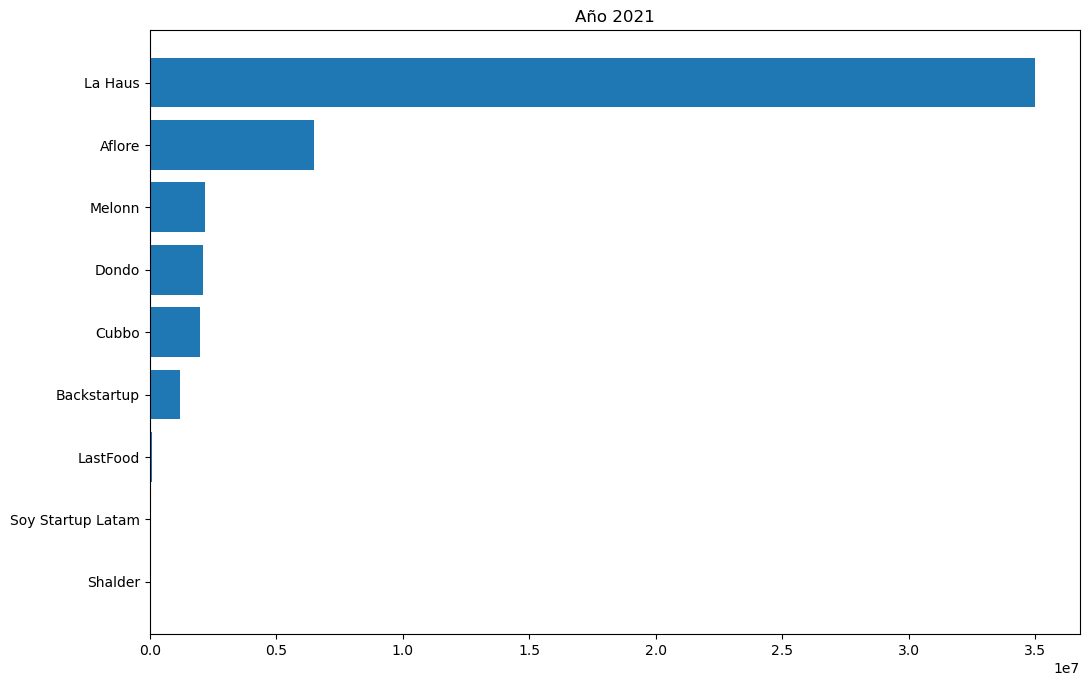

<ipython-input-17-4e4d0ad4c6b2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results.sort_values(by=["Last Equity Funding Amount Currency (in USD)"], inplace=True, ascending=True)


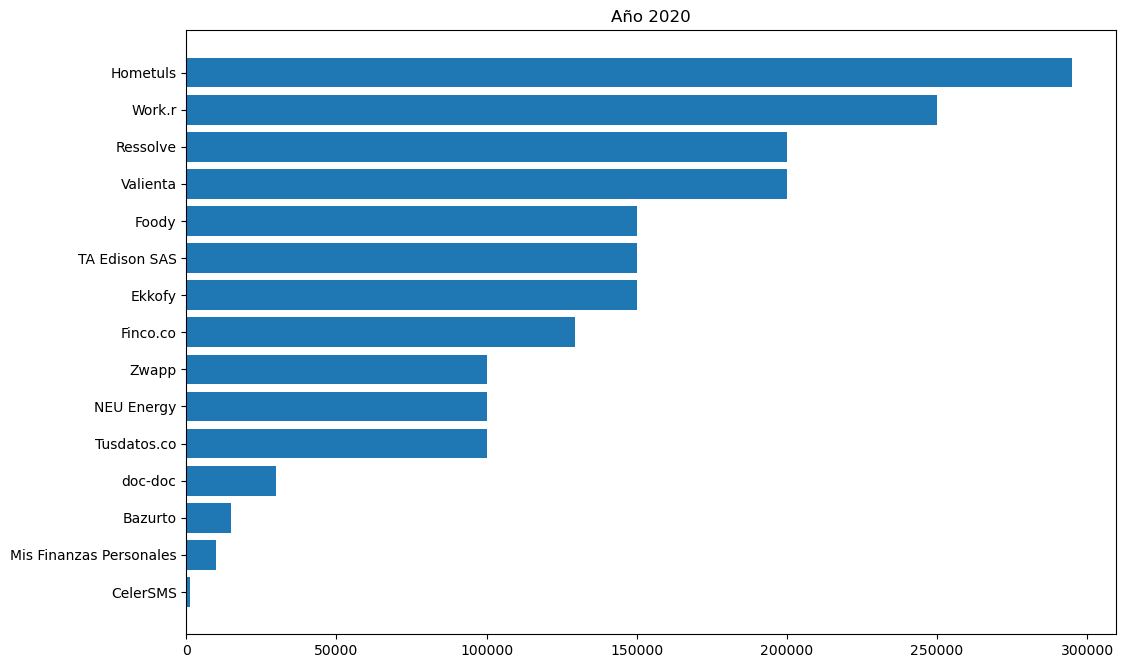

<ipython-input-17-4e4d0ad4c6b2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results.sort_values(by=["Last Equity Funding Amount Currency (in USD)"], inplace=True, ascending=True)


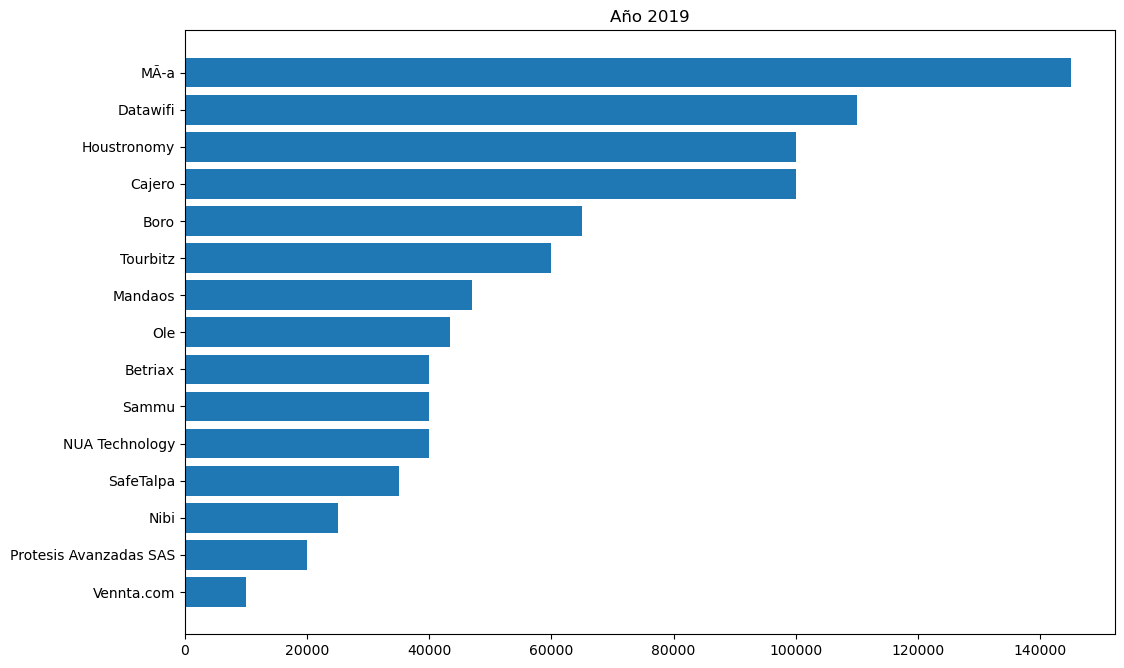

<ipython-input-17-4e4d0ad4c6b2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results.sort_values(by=["Last Equity Funding Amount Currency (in USD)"], inplace=True, ascending=True)


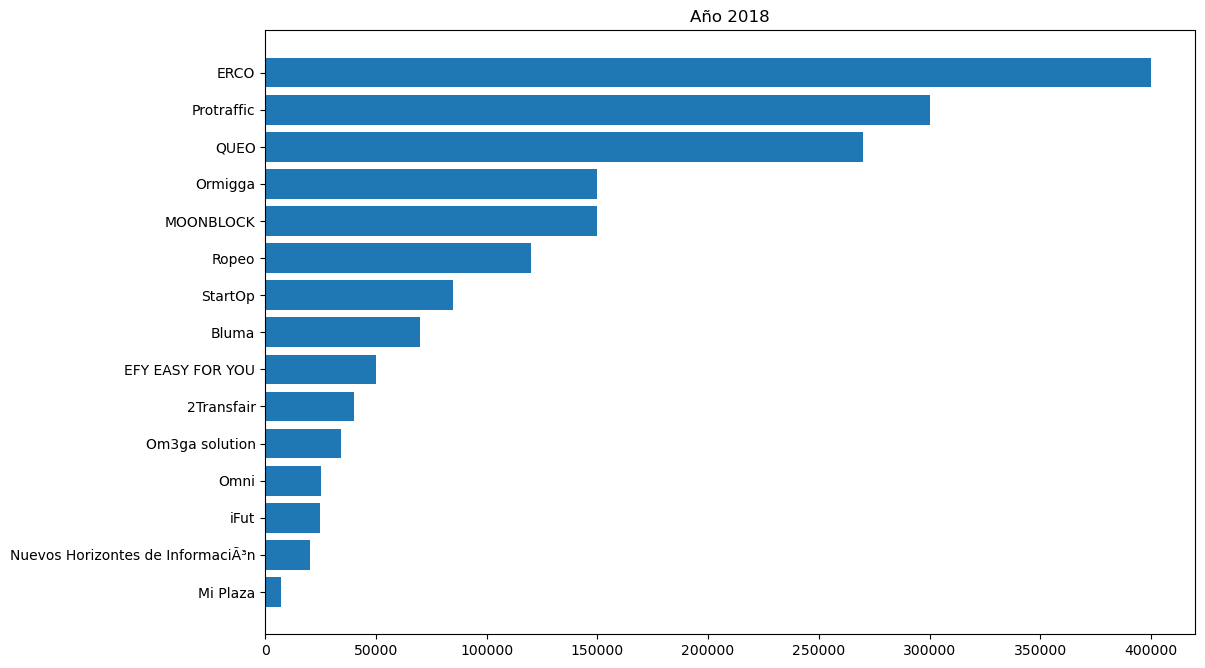

<ipython-input-17-4e4d0ad4c6b2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results.sort_values(by=["Last Equity Funding Amount Currency (in USD)"], inplace=True, ascending=True)


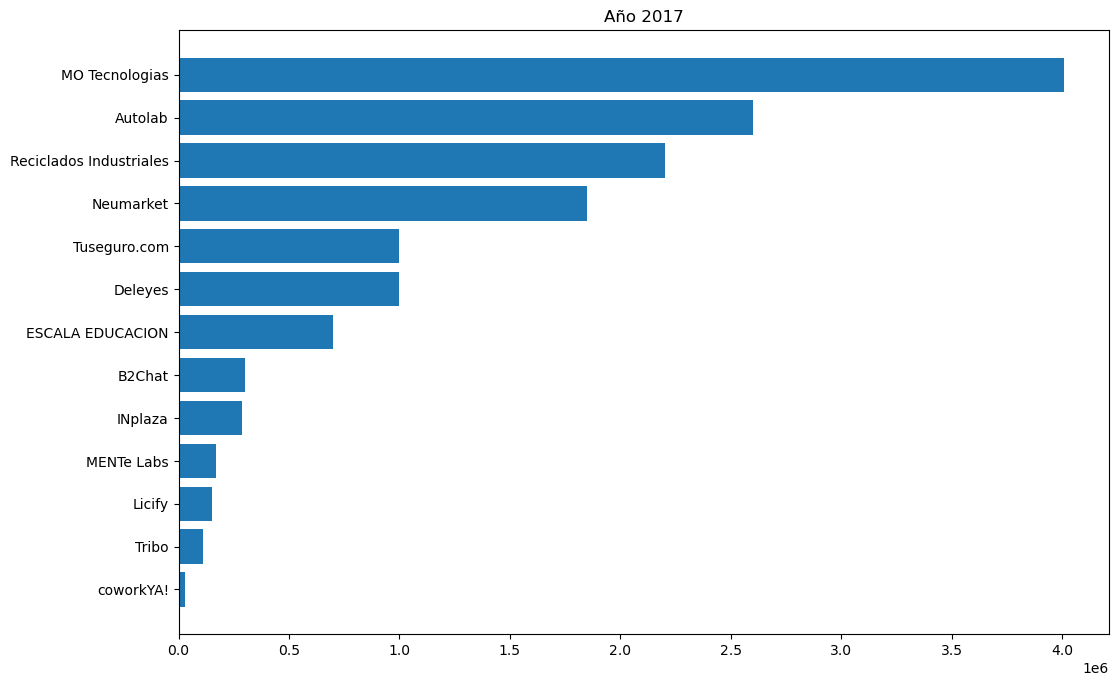

<ipython-input-17-4e4d0ad4c6b2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results.sort_values(by=["Last Equity Funding Amount Currency (in USD)"], inplace=True, ascending=True)


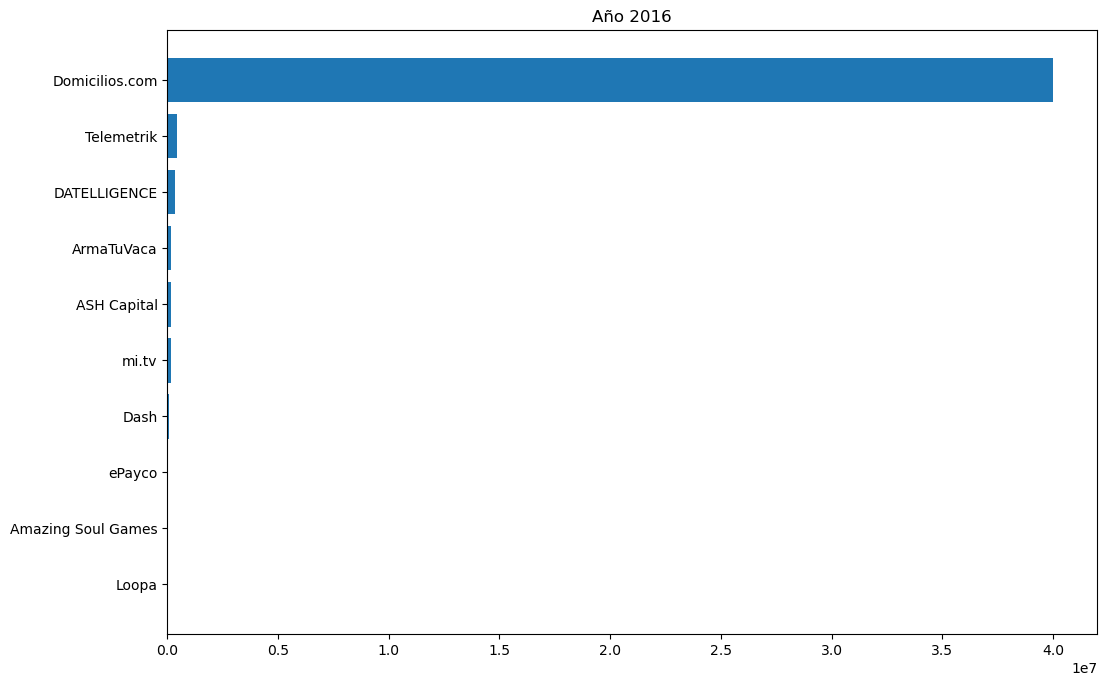

<ipython-input-17-4e4d0ad4c6b2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results.sort_values(by=["Last Equity Funding Amount Currency (in USD)"], inplace=True, ascending=True)


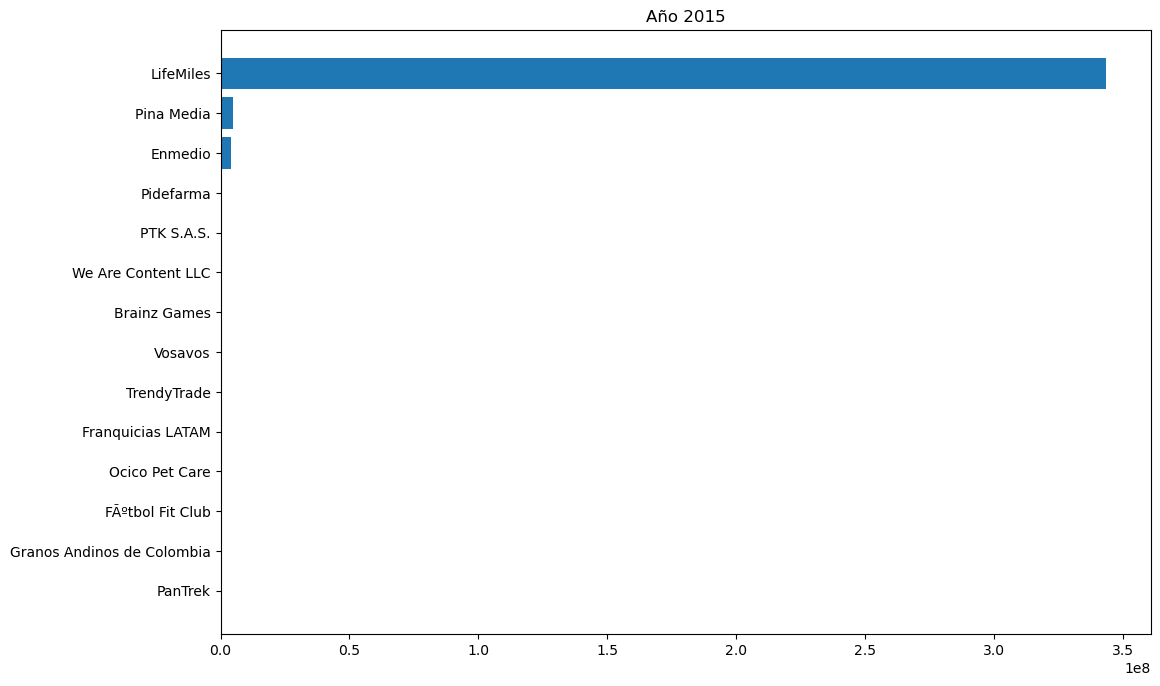

<ipython-input-17-4e4d0ad4c6b2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results.sort_values(by=["Last Equity Funding Amount Currency (in USD)"], inplace=True, ascending=True)


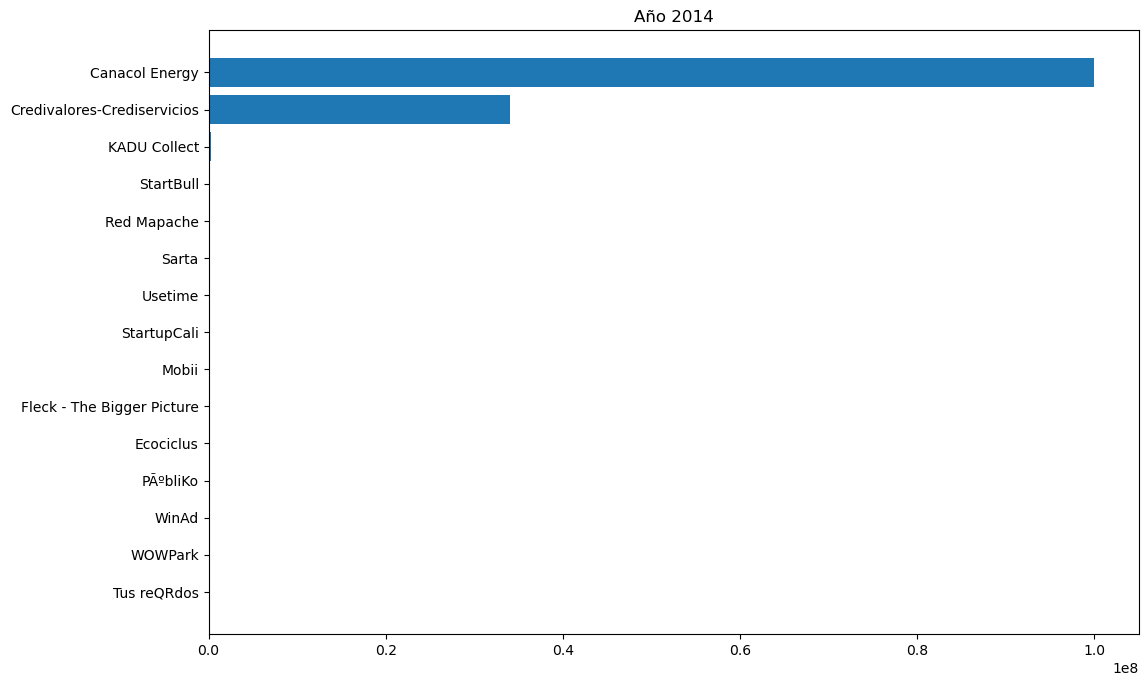

<ipython-input-17-4e4d0ad4c6b2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results.sort_values(by=["Last Equity Funding Amount Currency (in USD)"], inplace=True, ascending=True)


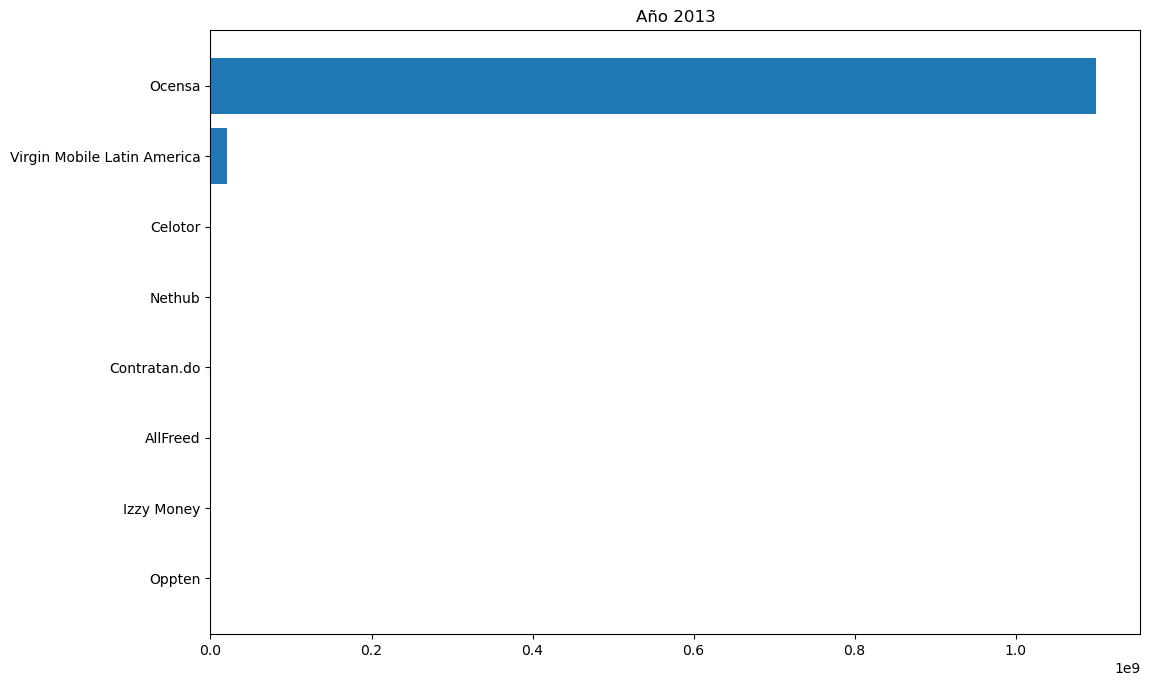

<ipython-input-17-4e4d0ad4c6b2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results.sort_values(by=["Last Equity Funding Amount Currency (in USD)"], inplace=True, ascending=True)


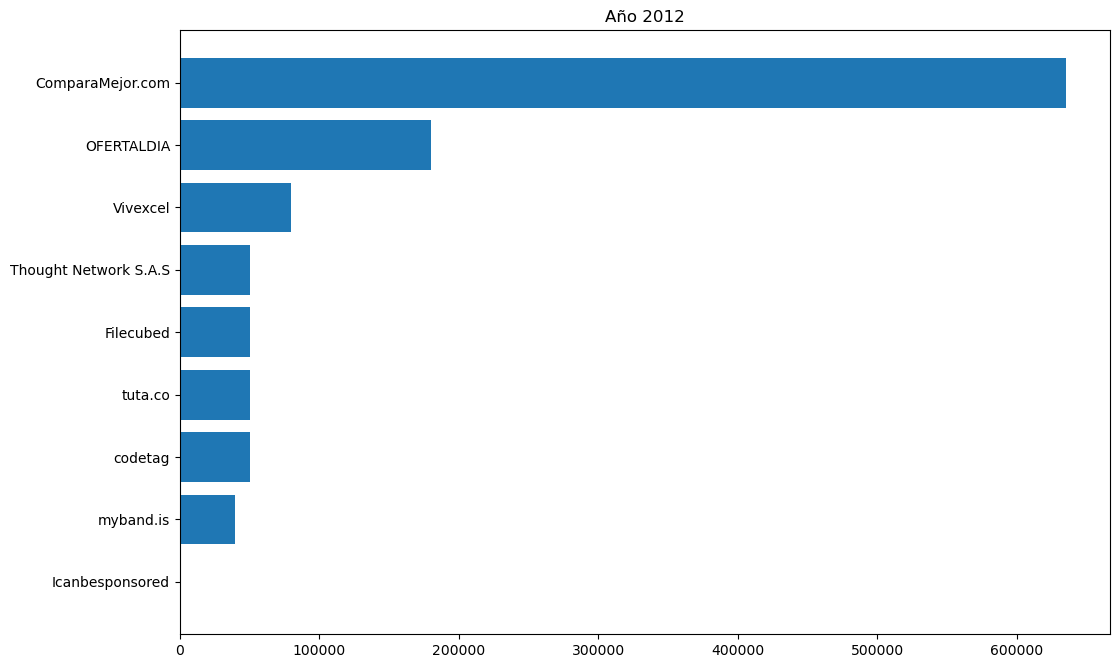

<ipython-input-17-4e4d0ad4c6b2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results.sort_values(by=["Last Equity Funding Amount Currency (in USD)"], inplace=True, ascending=True)


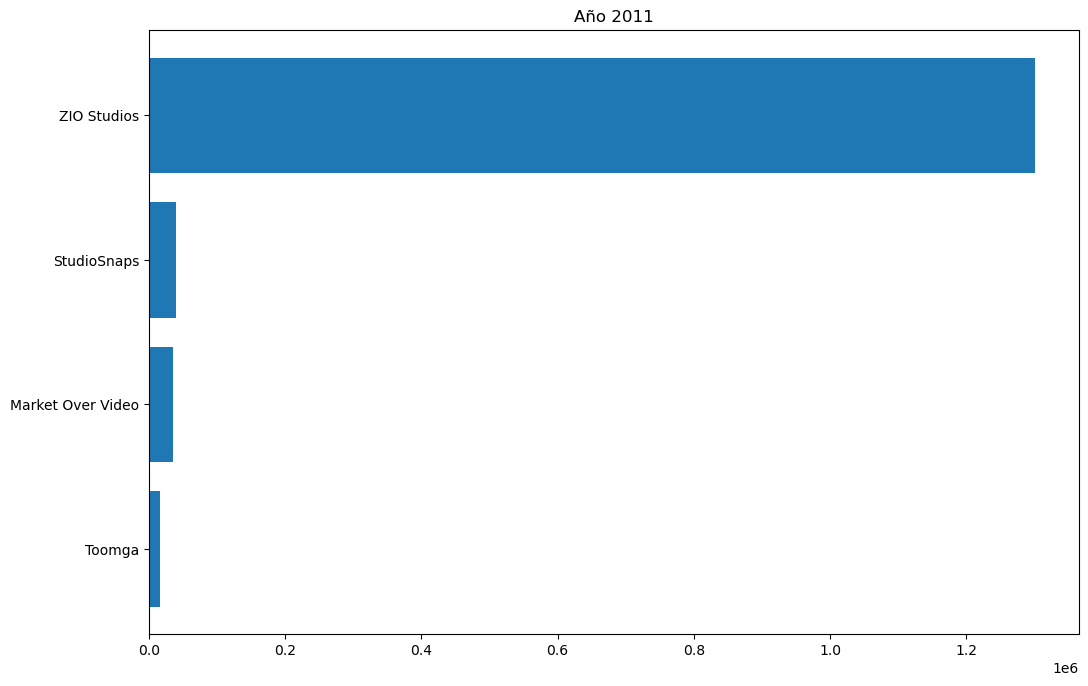

<ipython-input-17-4e4d0ad4c6b2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results.sort_values(by=["Last Equity Funding Amount Currency (in USD)"], inplace=True, ascending=True)


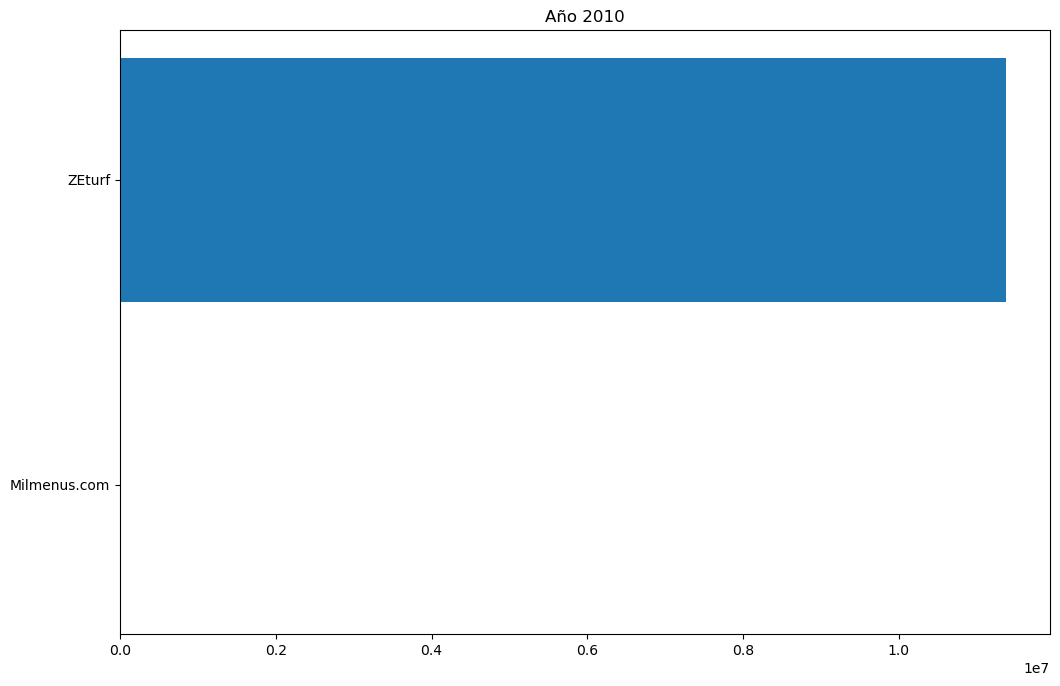

<ipython-input-17-4e4d0ad4c6b2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results.sort_values(by=["Last Equity Funding Amount Currency (in USD)"], inplace=True, ascending=True)


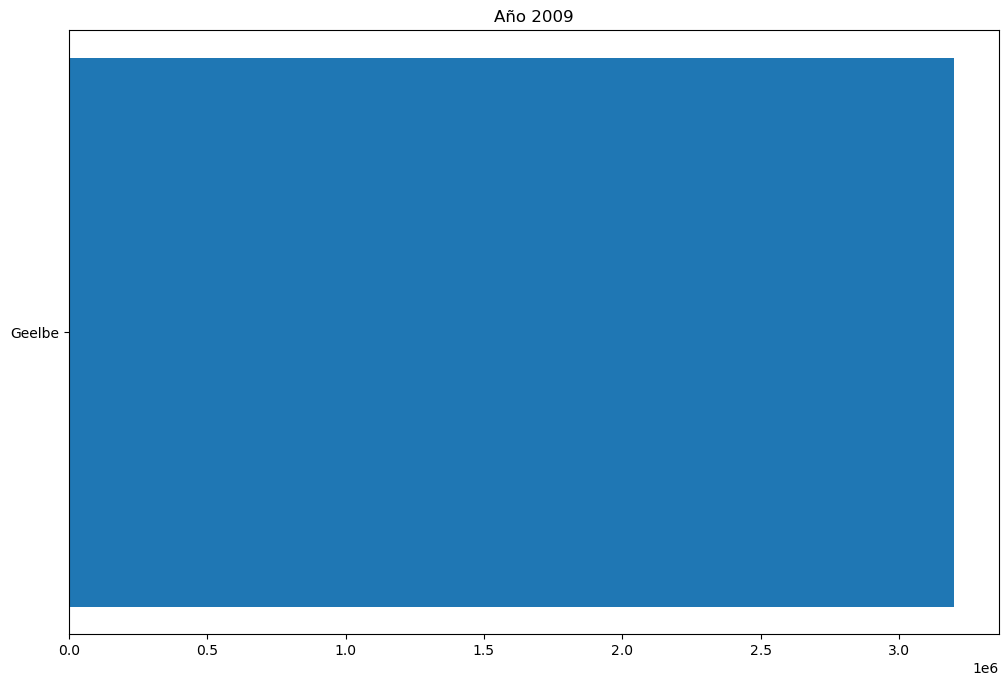

<ipython-input-17-4e4d0ad4c6b2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results.sort_values(by=["Last Equity Funding Amount Currency (in USD)"], inplace=True, ascending=True)


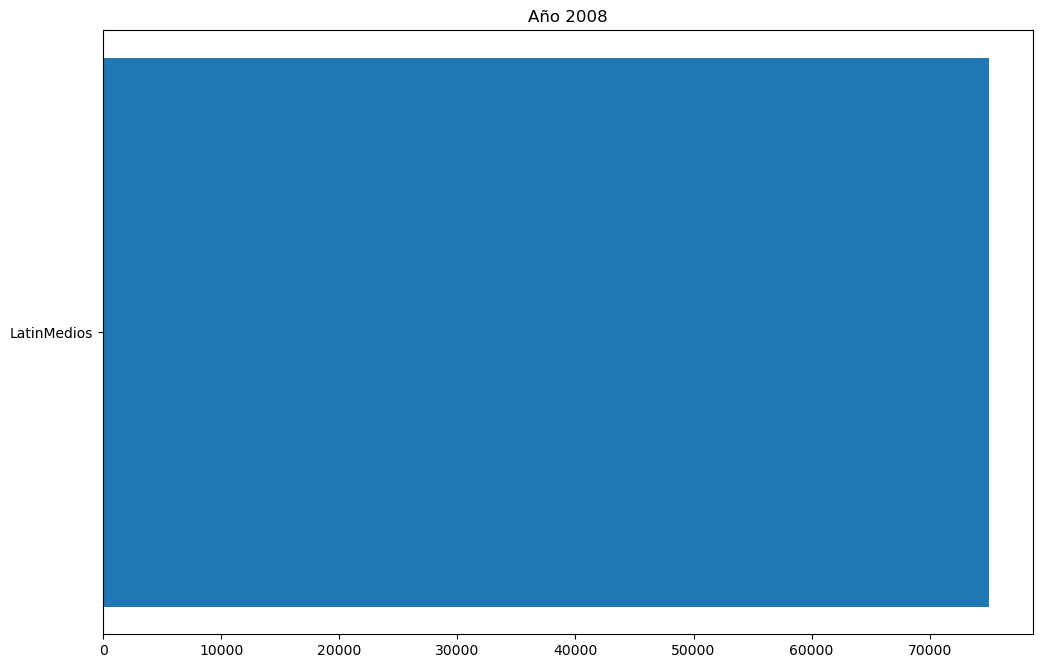

In [17]:
data.sort_values(by=["year","Last Equity Funding Amount Currency (in USD)"], inplace=True, ascending=False)
df = data.copy()
df = df.drop(df[df["year"] == 0].index)
df = df.drop(df[df["Last Equity Funding Amount Currency (in USD)"] == 0].index)

yearsSet = set(df["year"].tolist())
yearOrderList = sorted(list(yearsSet),reverse=True)

for year in yearOrderList:
    
    results = df[ df["year"] == year ]
    results.sort_values(by=["Last Equity Funding Amount Currency (in USD)"], inplace=True, ascending=True)
    top15 = results.head(15).copy()
    
    plt.title("Año %s"%(year))
    plt.barh(top15["Organization Name"].tolist(),top15["Last Equity Funding Amount Currency (in USD)"].tolist())
    plt.show()

